In [118]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display

In [119]:

tickers = 'BTC-USD,DX=F,GC=F,SI=F,^GSPC,^TNX,^IXIC,DFII10,CNPMI'.split(',')
labels = 'BTC,Dollar,Gold,Silver,SP500,10YR,NASDAQ,10YRTIP,CNPMI'.split(',')
path = '/Users/Emmmaxue/PycharmProjects/Data/'
yield_cols = ['EInf', '10YRTIP', '10YR']
df = []
for label, ticker in zip(labels, tickers):
    
    data = pd.read_csv(path+ticker+'.csv', index_col=0)
    if 'Adj Close' in data:
        data = data['Adj Close']
    else: 
        data = pd.to_numeric(data.squeeze(), errors='coerce')
    data.index = pd.to_datetime(data.index)
    df.append(data.to_frame(label))
prices = pd.concat(df, axis=1)

prices['EInf'] = prices['10YR'] - prices['10YRTIP']

In [107]:
prices.tail(50)

,BTC,Dollar,Gold,Silver,SP500,10YR,NASDAQ,10YRTIP,CNPMI,EInf
2020-11-23,18364.121094,92.494003,1837.800049,23.624001,3577.590088,0.857,11880.629883,-0.85,NaN,1.707
2020-11-24,19107.464844,92.220001,1804.800049,23.292000,3635.409912,0.882,12036.790039,-0.86,NaN,1.742
2020-11-25,18732.121094,91.966003,1805.699951,23.356001,3629.649902,0.878,12094.400391,-0.87,NaN,1.748
2020-11-26,17150.623047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-27,17108.402344,NaN,NaN,NaN,3638.350098,NaN,12205.849609,-0.91,NaN,NaN
2020-11-28,17717.414063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-29,18177.484375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-30,19625.835938,91.858002,1775.699951,22.534000,3621.629883,0.844,12198.740234,-0.93,52.1,1.774
2020-12-01,18802.998047,91.296997,1814.099976,24.033001,3662.449951,0.934,12355.110352,-0.89,NaN,1.824
2020-12-02,19201.091797,91.114998,1825.699951,24.025000,3669.010010,0.948,12349.370117,-0.90,NaN,1.848


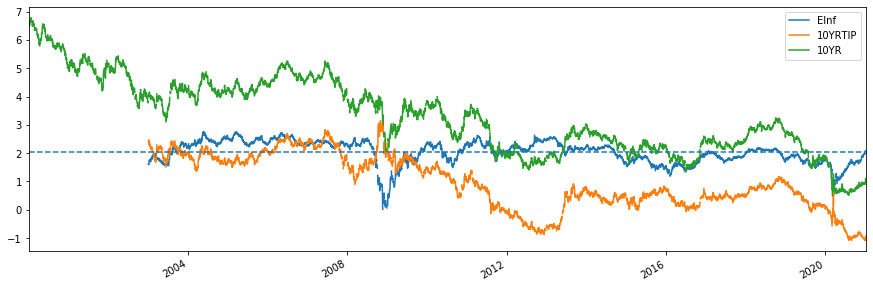

In [108]:

prices[yield_cols].loc['2000-01-01':].plot(figsize=(15, 5))
plt.axhline(prices.loc[:'2020-01-01', 'EInf'].mean(), ls='--')

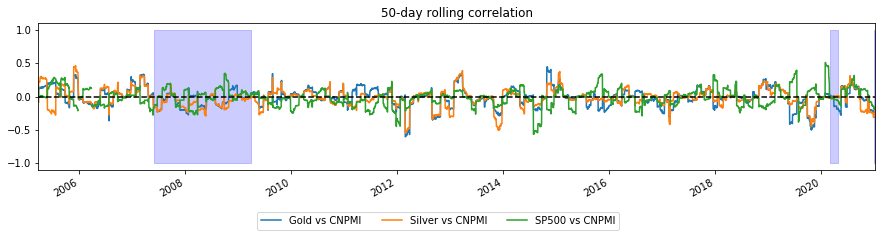

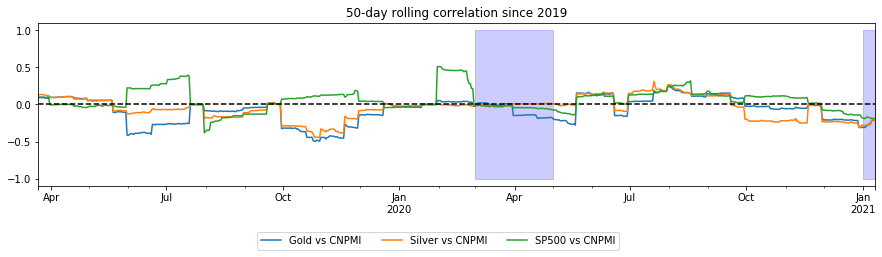

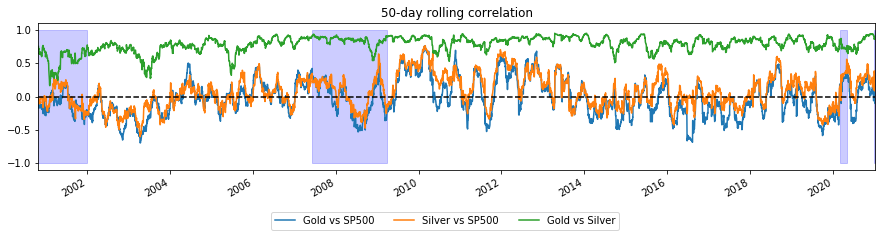

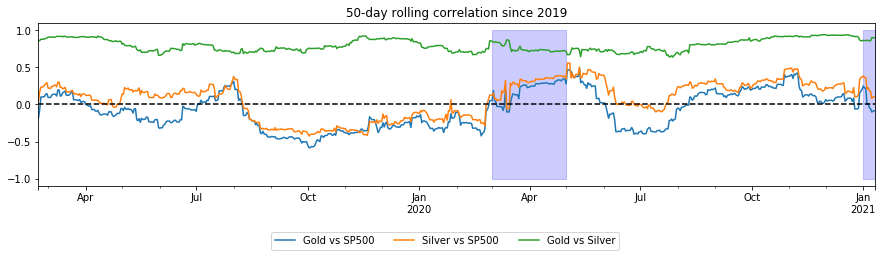

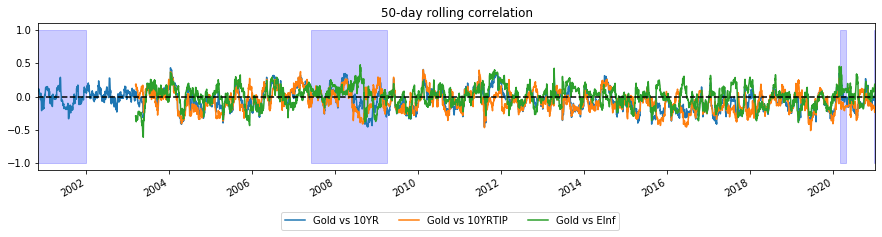

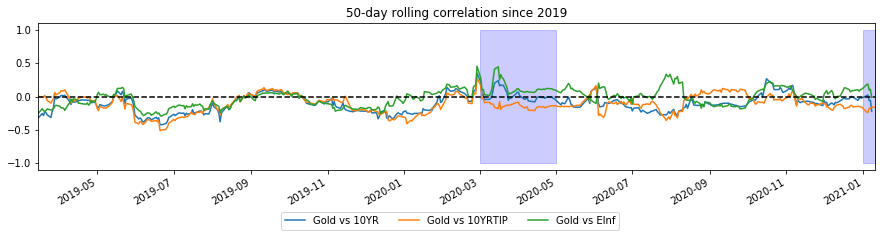

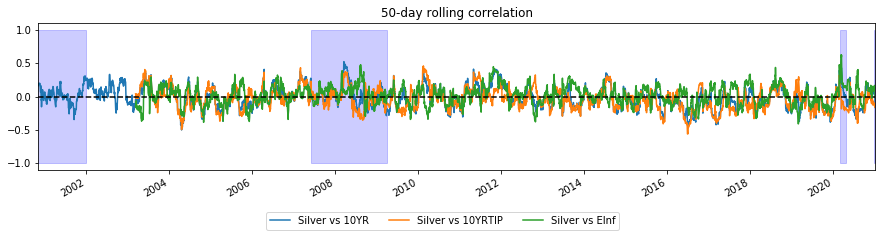

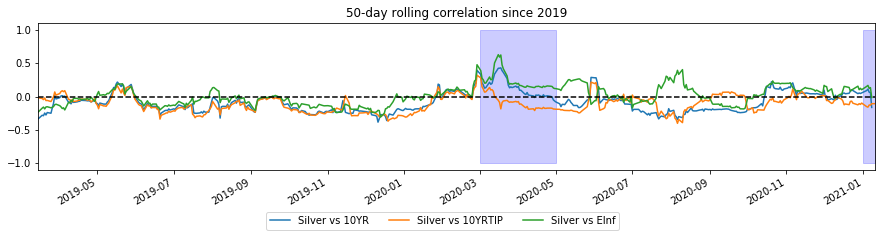

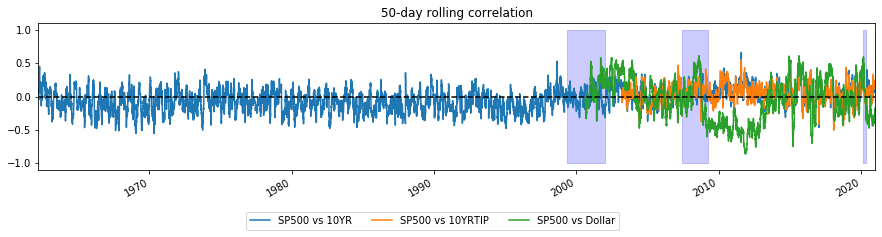

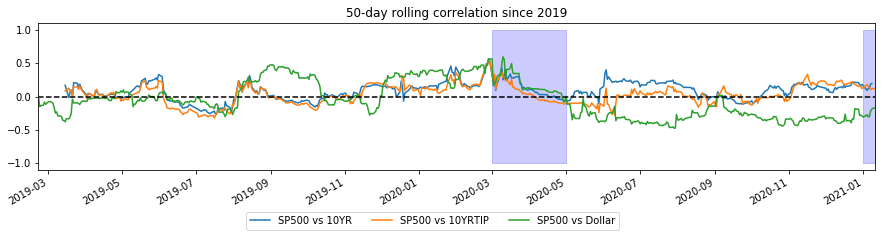

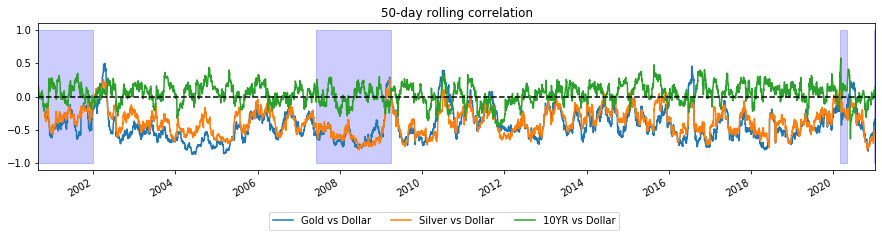

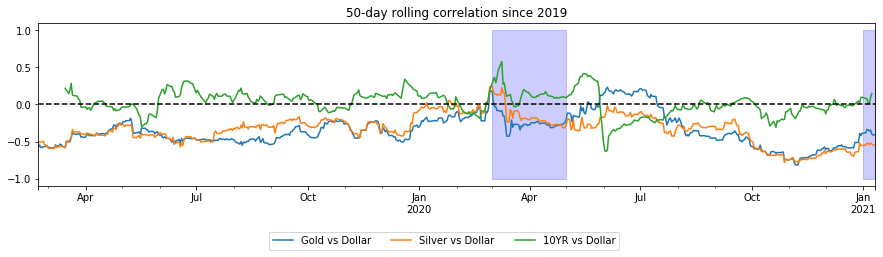

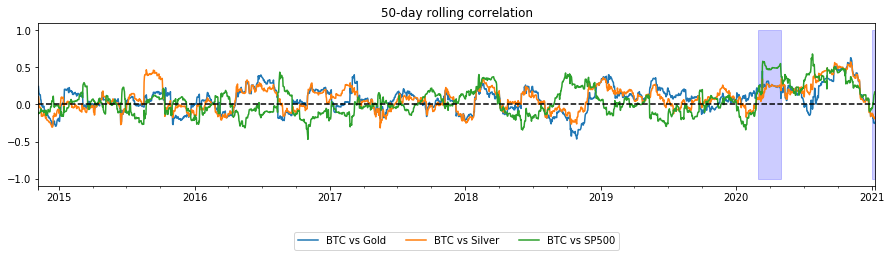

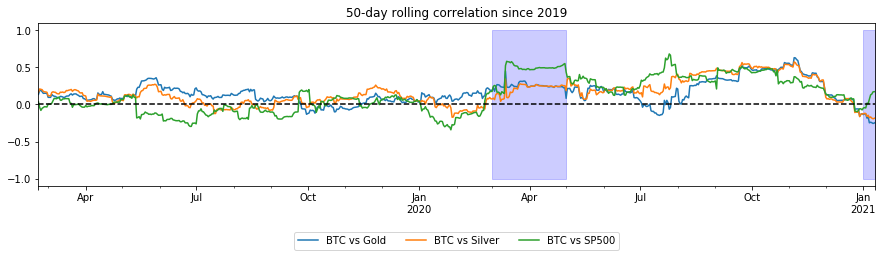

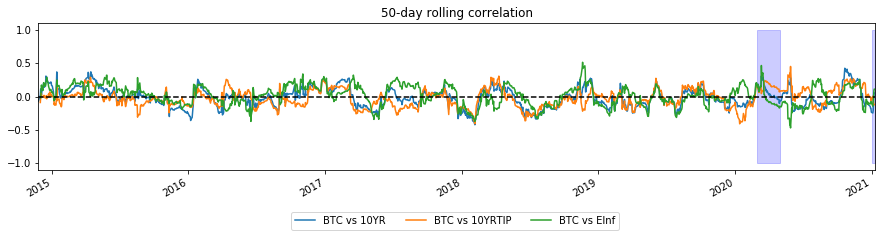

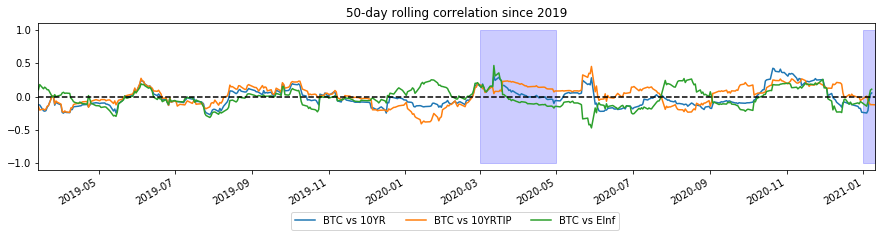

In [122]:

def plotter(pairs, prices, rolling_window=50, title=''):
    for pair in pairs:
        pair = list(pair)
        ts = prices[pair].copy() 
        for asset in pair:
            # transform asset prices into returns; yields are not returns
            if asset not in yield_cols:
                ts[asset] = ts[asset].pct_change()
        ts.dropna(inplace=True)
        rolling_corr = ts[pair[0]].rolling(window=rolling_window).corr(ts[pair[1]]).dropna()
        rolling_corr.plot(title=title, figsize=(15, 3), label=' vs '.join(pair))
    plt.axhline(0, ls='--', color='black')
    for period in crisis_periods:
        plt.fill_between(period[:2], -1, 1, color='blue', alpha=.2)
    plt.legend(bbox_to_anchor=(0.7, -0.25), ncol=3)
    plt.show()
    
ticker_pairs = [
                ('Gold', 'CNPMI'), ('Silver', 'CNPMI'), ('SP500', 'CNPMI'),
                ('Gold', 'SP500'), ('Silver', 'SP500'), ('Gold', 'Silver'),
                ('Gold', '10YR'), ('Gold', '10YRTIP'), ('Gold', 'EInf'),
                ('Silver', '10YR'), ('Silver', '10YRTIP'), ('Silver', 'EInf'), 
                ('SP500', '10YR'), ('SP500', '10YRTIP'), ('SP500', 'Dollar'),
                ('Gold', 'Dollar'), ('Silver', 'Dollar'), ('10YR', "Dollar"),
                ('BTC', 'Gold'), ('BTC', 'Silver'), ('BTC', 'SP500'),
                ('BTC', '10YR'), ('BTC', '10YRTIP'), ('BTC', 'EInf'),
               ]

crsis_periods = [('2021-01-01', '2021-01-11', 'YTD'),
             ('2020-03-01', '2020-05-01', 'pandemic'),
             ('2007-06-01', '2009-04-01', 'GFC'),
             ('1999-05-01', '2002-01-01', 'dotcome bubble'),
                 ]
nrows = int(np.ceil(len(ticker_pairs)/3))
rolling_window = 50 # in business days not calendar days
for i in range(nrows):
    pairs = ticker_pairs[i*3:(i+1)*3]
    title = '{}-day rolling correlation'.format(rolling_window)
    # bitcoin is UTC time, so its daily return is not comparable to other assets'
    df = prices
    plotter(pairs, df, rolling_window, title)
    plotter(pairs, df.loc['2019-01-01':], rolling_window, title=title+' since 2019')
    


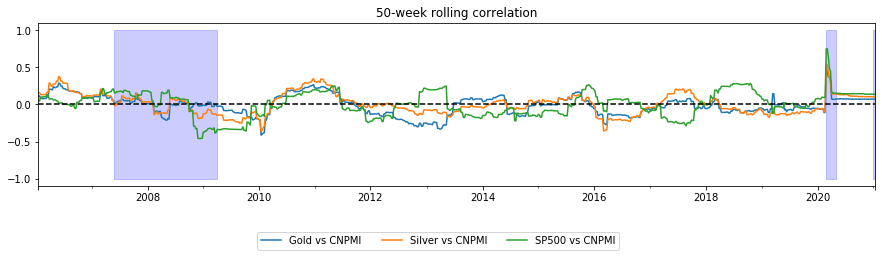

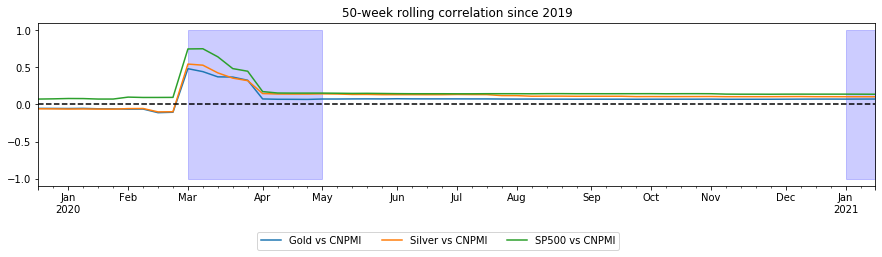

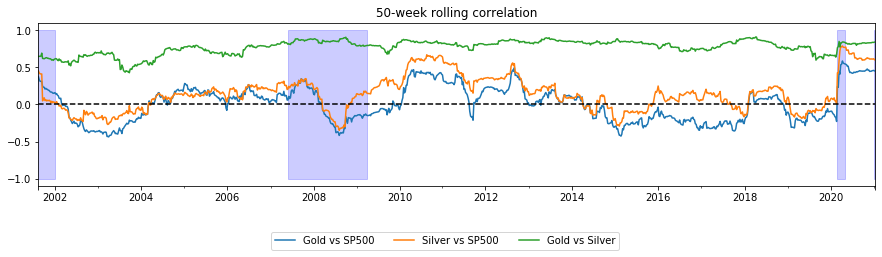

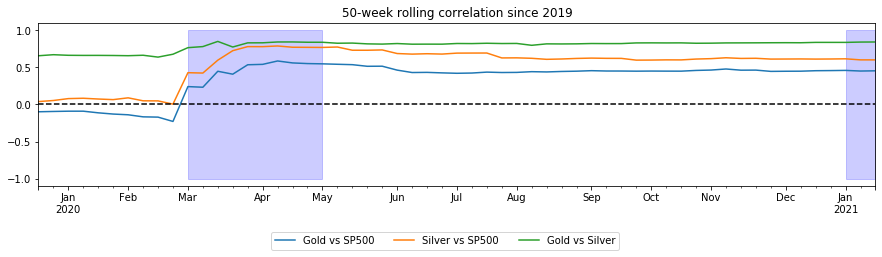

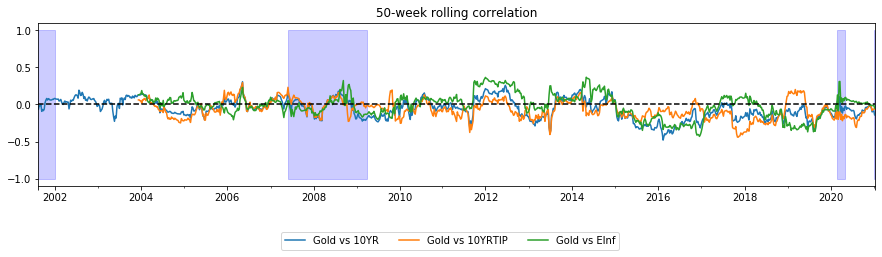

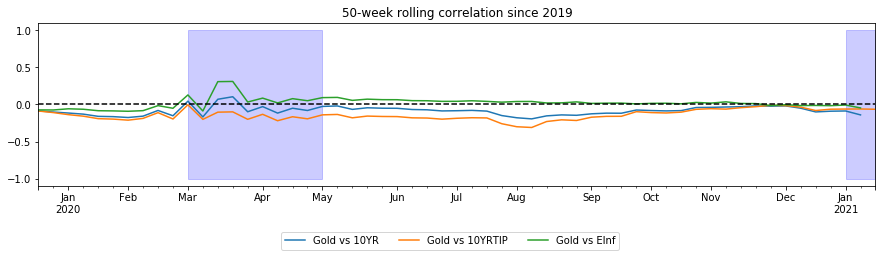

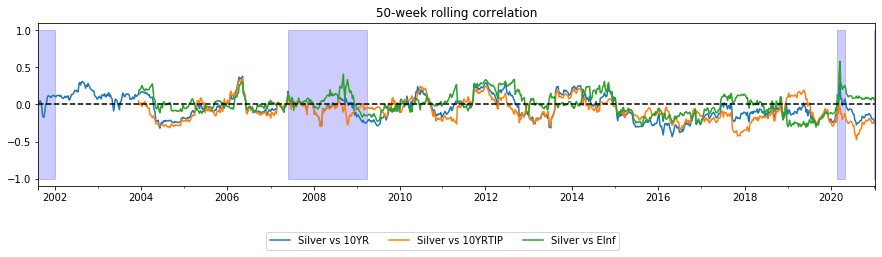

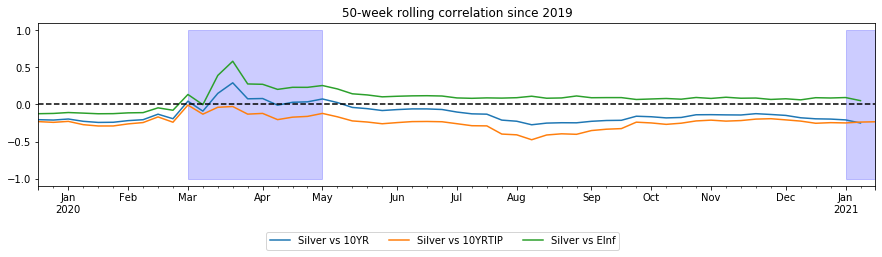

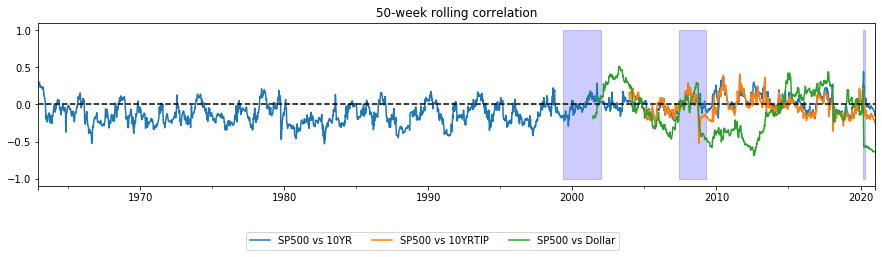

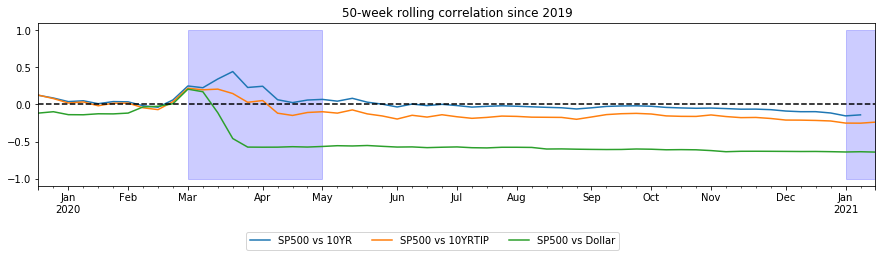

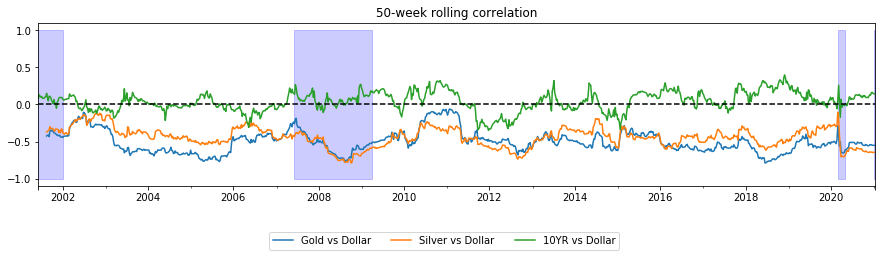

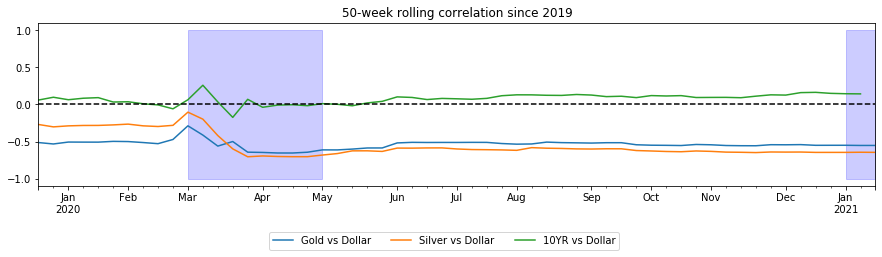

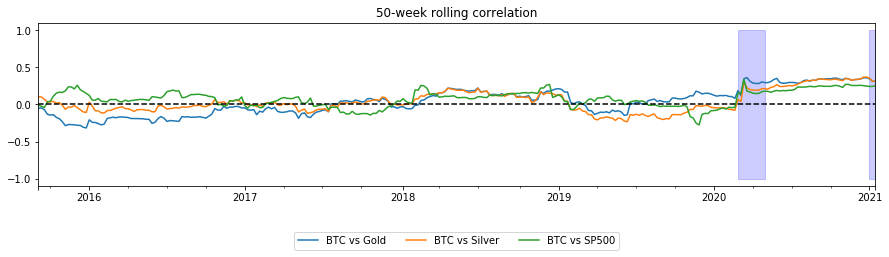

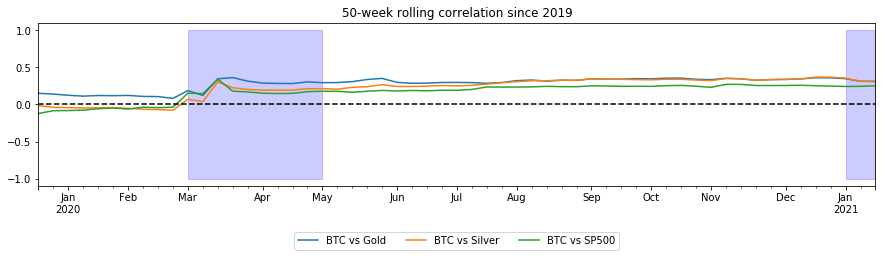

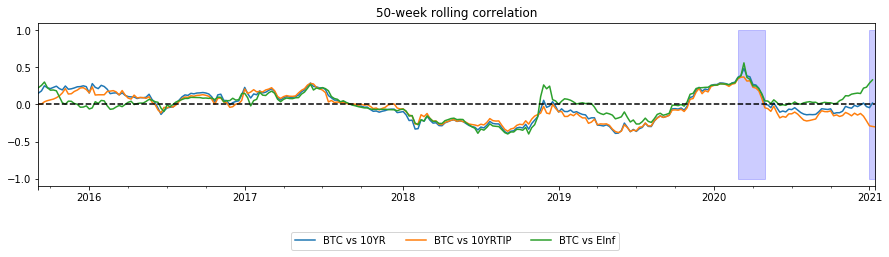

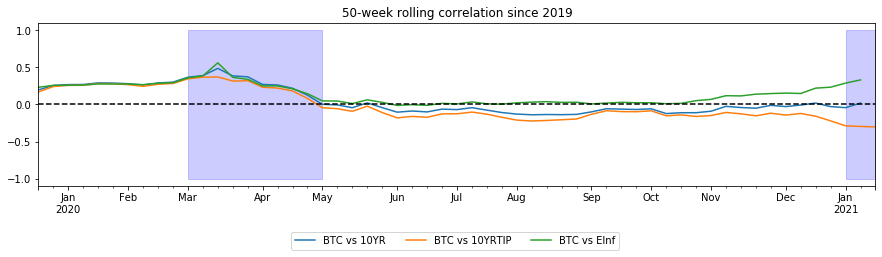

In [126]:
rolling_window = 50 # in weeks
for i in range(nrows):
    pairs = ticker_pairs[i*3:(i+1)*3]
    title = '{}-week rolling correlation'.format(rolling_window)
    
    # resample data to weekly
    df = prices.resample('W').last()
    
    plotter(pairs, df, rolling_window, title)
    plotter(pairs, df.loc['2019-01-01':], rolling_window, title=title+' since 2019')
    


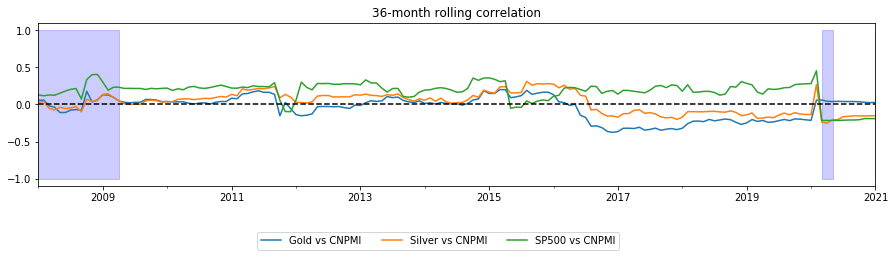

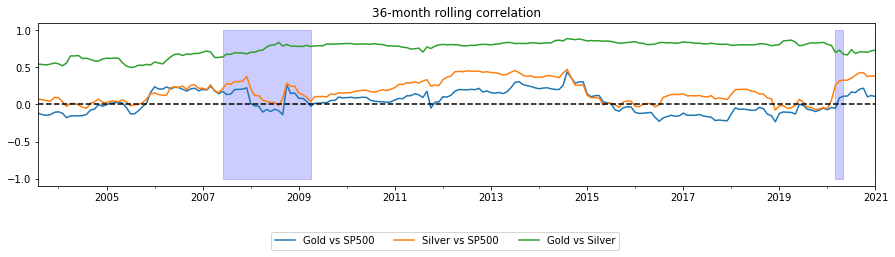

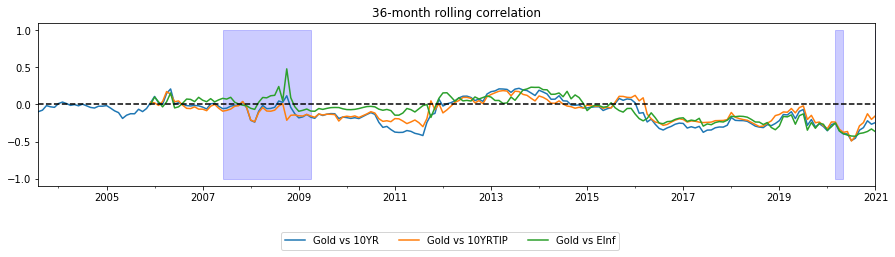

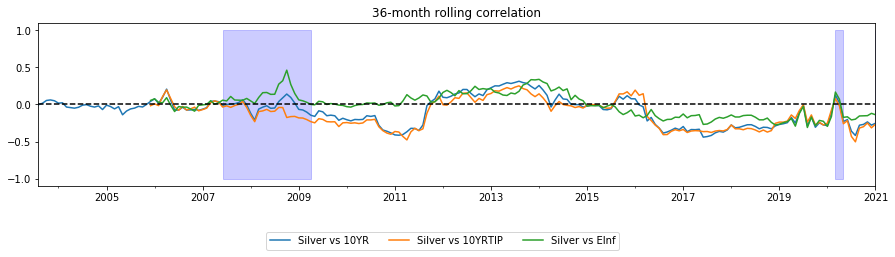

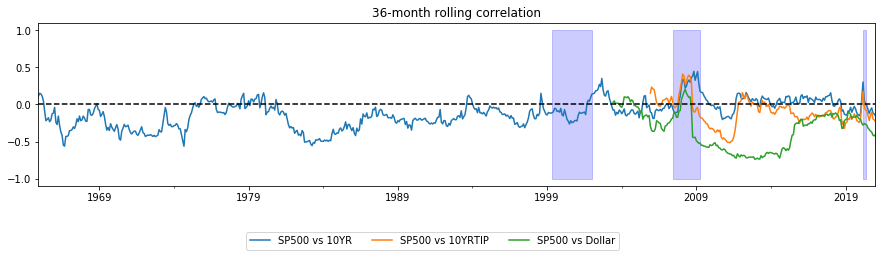

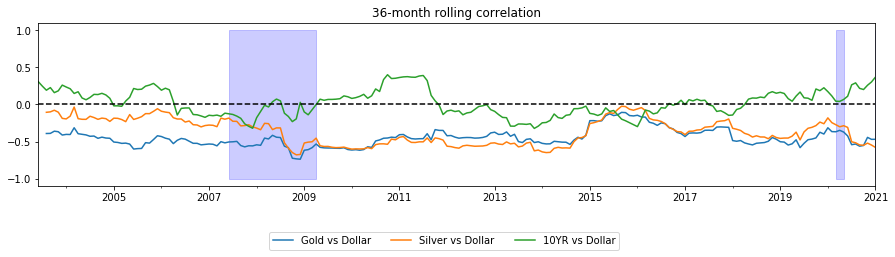

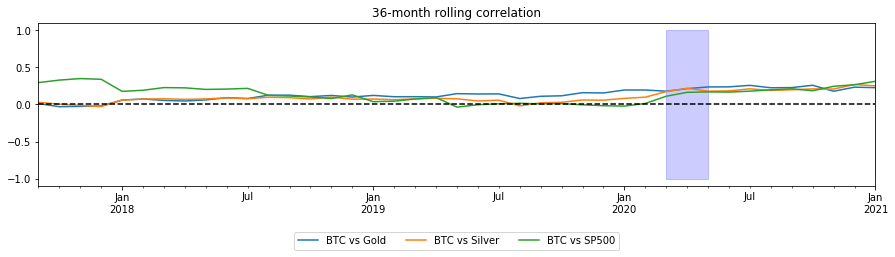

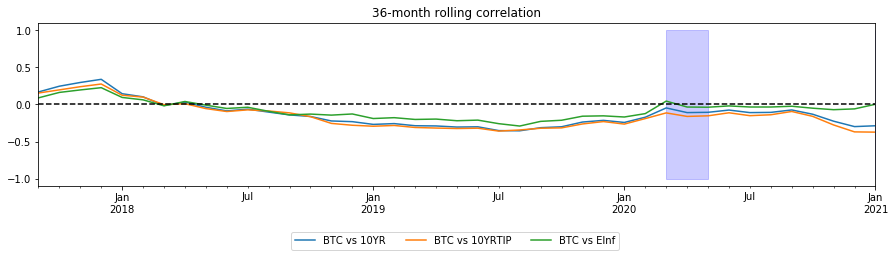

In [128]:
rolling_window = 36 # in months
for i in range(nrows):
    pairs = ticker_pairs[i*3:(i+1)*3]
    title = '{}-month rolling correlation'.format(rolling_window)
    
    # resample data to monthly
    df = prices.resample('M').last()
    
    plotter(pairs, df, rolling_window, title)
    

We can observe that:

- China PMI is weakly correlated with SP500 and Silver, less so with Gold, suggesting its pro-cycle growth feature and China's industrial use of Silver. A spike in positive correlation at the outset of global pandemic.
- The protection Gold and Silver can provide as a hedge to the stock market is very unstable. In terms of magnitude, it is also quite small and episodic, for example, for some short interval in the GFC; in other words, it does not hedge against the stock market in the long term.
- The more significant and consistent correlation Gold and Silver has is with Dollar. The correlation is consistently around -50%. With the second wave of Covid-19 in August, this negative correlation trends down stronger. This would explain the surge in Dollar since the confirmation of Senate and POTUS on Jan 6 of 2021 leading to a sudden collapse of Silver and Gold. 
- Theoretically, Gold and Silver as a hedge against inflation should have move the opposite way of expected inflation. Empirically, we do not observe this effect on the surface. On the contrary, we observe that at the outset of the pandemic, expected inflation tanked due to deflation; Fed lowered nominal yields to zeros while Gold and Silver experienced liquidity crisis and sold off. 
-  Bitcoin (only weekly and monthly correlations are correct), for the most part, has little correlation with Gold/Silver/SP500 until 2020 pandemic. The fiscal and monetary stimulus programs prop up all these asset markets. In other words, the government is creating wealth effect (out of thin air) and pours money into asset owners to combat the pandemic. 
- Bitcoin has weak-to-moderate negative correlation with yields and inflation, with the former getting stronger recently in 2021, showing its somewhat hedging yields and inflation. 

Based on these historical correlation, we should not trust Silver and Gold as a hedge but rather more as a speculation on the collapse of Dollar. 